# fft-embeddings

In [ ]:
import openai
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from openai.embeddings_utils import get_embeddings
import librosa

with open('/users/jasper/oai.txt', 'r') as f:
    openai.api_key = f.read()

def split_into_chunks(text, num_words=5):
    words = text.split()
    chunks = []
    for i in range(0, len(words)):
        chunk = ' '.join(words[i:i+num_words])
        # if not end of text
        if i+num_words <= len(words):
            chunks.append(chunk)
    return chunks

In [50]:
with open('gettysburg.txt', 'r') as f:
    gettysburg = f.read()

chunks = split_into_chunks(gettysburg, num_words=10)
print(len(chunks))

253


In [51]:
# Get embeddings for each chunk
embeddings = get_embeddings(chunks)

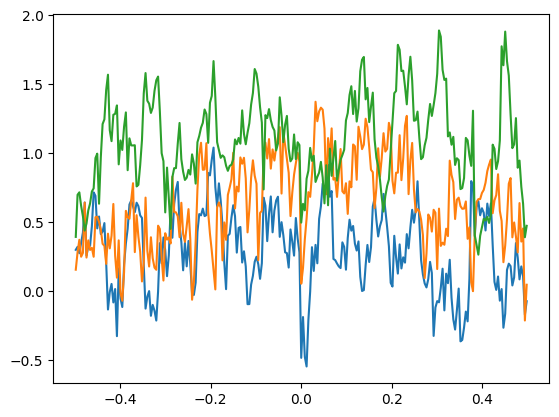

In [88]:
# perform the FFT on the embeddings
fft = np.fft.fft(embeddings)
# plt.plot(fft[:,:7])

every_nth_word = 1
freq = np.fft.fftfreq(fft.shape[0], d=1/every_nth_word)
fft = np.fft.fftshift(fft, axes=0)
freq = np.fft.fftshift(freq)

plt.plot(freq, fft[:,22:25])
plt.show()